Import statsmodels to do statistical analysis and modeling
'statsmodels.api' will help us to make varous models

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Read 'SP500_data.csv' that we created in the previous exercise.


In [2]:
df = pd.read_csv('../Data/SP500_data.csv')
df

,year,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return
0,1950,0.0744,7.47,11.90,0.0257,21.21,NaN
1,1951,0.0602,9.95,12.53,0.0268,24.19,0.140500
2,1952,0.0541,10.86,13.01,0.0283,26.18,0.082265
3,1953,0.0584,10.10,12.00,0.0248,25.46,-0.027502
4,1954,0.0440,12.58,15.99,0.0261,35.60,0.398272
...,...,...,...,...,...,...,...
65,2015,0.0211,22.18,24.21,0.0209,1918.60,-0.054029
66,2016,0.0203,23.59,28.06,0.0243,2275.12,0.185823
67,2017,0.0185,24.97,33.31,0.0258,2789.80,0.226221
68,2018,0.0209,19.60,28.38,0.0271,2607.39,-0.065385


Select 3 columns that we're interested from the dataframe 'df'.
To make a dataframe, use two square brackets.

In [9]:
df = df[['year','annual_return','dividendYield']]
df

,year,annual_return,dividendYield
0,1950,NaN,0.0744
1,1951,0.140500,0.0602
2,1952,0.082265,0.0541
3,1953,-0.027502,0.0584
4,1954,0.398272,0.0440
...,...,...,...
65,2015,-0.054029,0.0211
66,2016,0.185823,0.0203
67,2017,0.226221,0.0185
68,2018,-0.065385,0.0209


The `describe()` method calculates all the descriptive statistics and quartiles at once and returns the result as dataframe. 

In [6]:
df[['annual_return', 'dividendYield']].describe()

,annual_return,dividendYield
count,69.000000,70.000000
mean,0.087539,0.031957
std,0.155873,0.013357
min,-0.372204,0.011700
25%,-0.027502,0.020225
50%,0.104931,0.031000
75%,0.199279,0.037950
max,0.398272,0.074400


you can use 'loc' method to access a group of rows and columns by label(s) or a boolean array

In [10]:
df.loc[df['annual_return'] > 0]['annual_return'].describe()

count    50.000000
mean      0.163425
std       0.096976
min       0.014003
25%       0.084393
50%       0.141571
75%       0.237874
max       0.398272
Name: annual_return, dtype: float64

In [11]:
df.loc[df['annual_return'] < 0]['annual_return'].describe()

count    19.000000
mean     -0.112162
std       0.089963
min      -0.372204
25%      -0.138426
50%      -0.094871
75%      -0.053479
max      -0.016364
Name: annual_return, dtype: float64

The `plot()` method from pandas provides a number of plot styles other than the default line plot. These styles can be provided using the `kind` keyword argument to plot(). It can be ‘bar’, ‘hist', ‘box’, ‘kde’ or ‘density’, ‘area’, ‘scatter’, ‘pie’ and so forth.

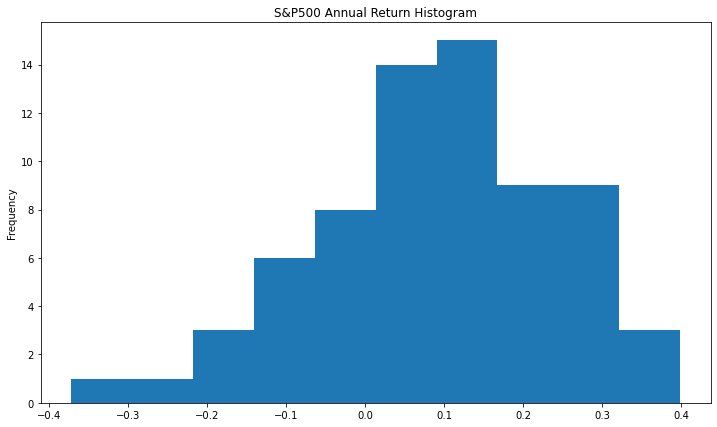

In [12]:
df['annual_return'].plot(kind = 'hist', figsize = (12, 7), title = 'S&P500 Annual Return Histogram')

Drawing a QQ plot using 'qqplot()' from statsmodel.


[Text(0.5, 0, 'Normal Scores'), Text(0, 0.5, 'S&P500 Annual Return')]

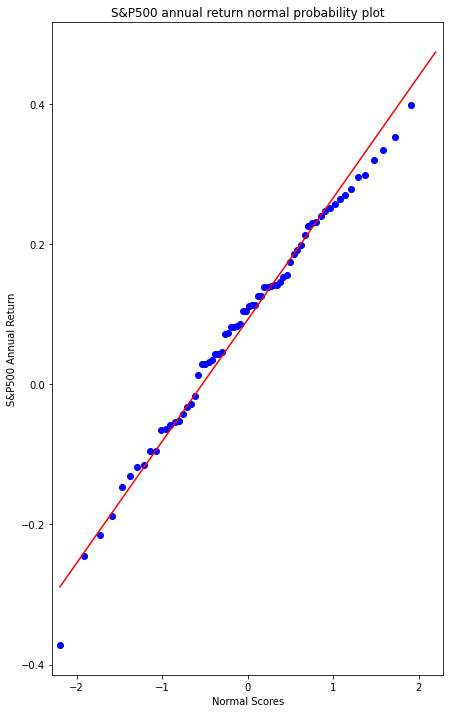

In [8]:
fig, ax = plt.subplots(figsize = (7, 12))
fig = sm.qqplot(df['annual_return'], line = 'q', ax = ax)
ax.set_title('S&P500 annual return normal probability plot')
ax.set(xlabel="Normal Scores", ylabel="S&P500 Annual Return")

Shift annual_return for linear regerssion

In [14]:
return_shifted = df.copy()
return_shifted['annual_return'] = return_shifted['annual_return'].shift(-1)
return_shifted

,year,annual_return,dividendYield
0,1950,0.140500,0.0744
1,1951,0.082265,0.0602
2,1952,-0.027502,0.0541
3,1953,0.398272,0.0584
4,1954,0.240169,0.0440
...,...,...,...
65,2015,0.185823,0.0211
66,2016,0.226221,0.0203
67,2017,-0.065385,0.0185
68,2018,0.252356,0.0209


To construct a linear regression model, we use `ols` class from statsmodel libarary. The `fit()` method from `ols` class will produce the parameter estimates. We give the formula as the first argument. On the left of `~` in the formula is the dependent variable, on the right is the independent variable. You can check the result by calling summary() or summary2() method.

In [15]:
result = smf.ols("annual_return ~ dividendYield", data = return_shifted).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          annual_return   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.086
Date:                Sat, 13 Mar 2021   Prob (F-statistic):             0.0472
Time:                        07:17:27   Log-Likelihood:                 32.890
No. Observations:                  69   AIC:                            -61.78
Df Residuals:                      67   BIC:                            -57.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0025      0.048     -0.052      0.959      -0.099       0.094
dividendYield     2.7998      1.385      2.021      0.047       0.035       5.564
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.805
Skew:                          -0.374   Prob(JB):                        0.406
Kurtosis:                       2.737   Cond. No.                         75.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'summary()' returns a string format of summary, but 'summary2()' will return Dataframe.
'summary2's 'table'has the regression result as tables.
Take the second table with the regression coefficients information.
You can choose rows you want using 'iloc'.

In [18]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.043   
Dependent Variable: annual_return    AIC:                -61.7809
Date:               2021-03-13 07:25 BIC:                -57.3127
No. Observations:   69               Log-Likelihood:     32.890  
Df Model:           1                F-statistic:        4.086   
Df Residuals:       67               Prob (F-statistic): 0.0472  
R-squared:          0.057            Scale:              0.023242
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.0025    0.0482  -0.0518  0.9588  -0.0986  0.0937
dividendYield   2.7998    1.3850   2.0215  0.0472   0.0352  5.5643
-----------------------------------------------------------------
Omnibus:               1.843        Durbin-Watson:          2.043
Prob(Omnibus):         0.398        Jarque-Bera (JB):       1.805
Skew:                  -0.374       Prob(JB):               0.406
Kurtosis:              2.737        Condition No.:          76   
=================================================================

"""

In [16]:
table = result.summary2().tables[1].iloc[1:,]
table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
dividendYield,2.799775,1.385029,2.021455,0.04723,0.035245,5.564304


The result has 'rsquared_adj' and you can add the column wih this value to the dataframe table.

In [12]:
table["adj_rsquared"] =result.rsquared_adj
table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],adj_rsquared
dividendYield,2.799775,1.385029,2.021455,0.04723,0.035245,5.564304,0.043416
